In [5]:
### These are the libraries we use to extract the data and perform some operations on the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("IPL Data (1).xlsx")
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
df.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415.0,2.0,Chennai Super Kings,Mumbai Indians,20.0,2.0,RA Jadeja,SR Watson,SL Malinga,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
179074,11415.0,2.0,Chennai Super Kings,Mumbai Indians,20.0,3.0,SR Watson,RA Jadeja,SL Malinga,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
179075,11415.0,2.0,Chennai Super Kings,Mumbai Indians,20.0,4.0,SR Watson,RA Jadeja,SL Malinga,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,SR Watson,run out,KH Pandya
179076,11415.0,2.0,Chennai Super Kings,Mumbai Indians,20.0,5.0,SN Thakur,RA Jadeja,SL Malinga,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
179077,11415.0,2.0,Chennai Super Kings,Mumbai Indians,20.0,6.0,SN Thakur,RA Jadeja,SL Malinga,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SN Thakur,lbw,NaN


In [7]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
# Seperating the categorical and numerical columns
x = []
y = []
for i in df.columns:
    if df[i].dtype == 'object':
        x.append(i)
    else:
        y.append(i)
print("categorical columns:",x)
print("numerical columns:",y)

categorical columns: ['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']
numerical columns: ['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']


In [9]:
df.info()
# It gives you how many rows and any column has null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          179078 non-null  float64
 1   inning            179078 non-null  float64
 2   batting_team      179078 non-null  object 
 3   bowling_team      179078 non-null  object 
 4   over              179078 non-null  float64
 5   ball              179078 non-null  float64
 6   batsman           179078 non-null  object 
 7   non_striker       179078 non-null  object 
 8   bowler            179078 non-null  object 
 9   is_super_over     179078 non-null  float64
 10  wide_runs         179078 non-null  float64
 11  bye_runs          179078 non-null  float64
 12  legbye_runs       179078 non-null  float64
 13  noball_runs       179078 non-null  float64
 14  penalty_runs      179078 non-null  float64
 15  batsman_runs      179078 non-null  float64
 16  extra_runs        17

In [10]:
df.describe() 
# Getting all the statistical values for all numerical columns.

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
# We need to check the mean and median they need to be close enough for each column.
# If not we can conform there is outliers in that particluar column.


In [98]:
df.isnull().sum()
# Gives you the count of null values in each column if you do .sum() again you can get the total number
# null values.

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
# From above we can say oly three columns have  more null values but we can't able to remove that.
# These three columns are necessary for 1)when the player is dismissed
#                                       2)How he is dimmised
#                                       3)which bowler or fielder.

### checking the correlation how storngly my columns are corelated to each other.

<AxesSubplot:>

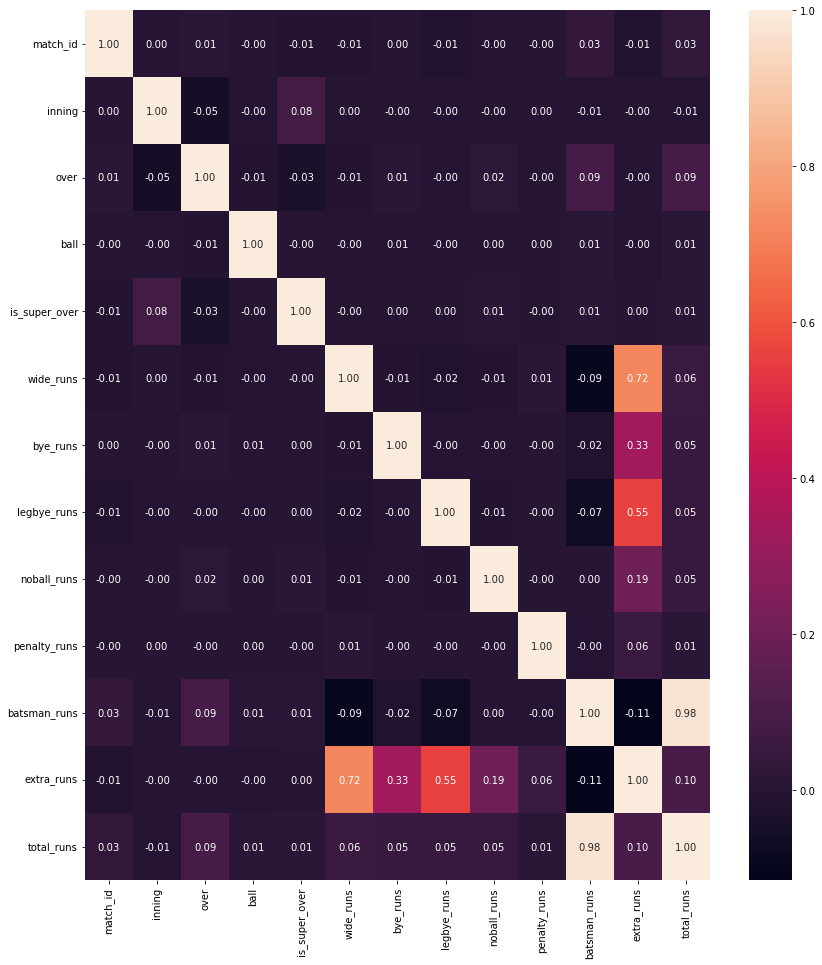

In [22]:
f,ax = plt.subplots(figsize=(14,16))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt=".2f" )

#### Number of balls bowled in the tournment.

In [28]:
Number_of_balls= df['ball'].count()
print("Total no of balls bowled is", Number_of_balls)

##### As the balls have values of 1,2,3,4,5 and 6; adding these values would not be correct. 
##### Hence, count of the column was taken as the number of balls.


Total no of balls bowled is 179078


In [12]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### Number of wickets in a tourment.

In [13]:
Number_of_wickets = df['dismissal_kind'].count()
print("No of wickets in the tourment: ", Number_of_wickets)


#### To calculate the number of wickets, non-null values of the "dismissal_kind" column were counted.

No of wickets in the tourment:  8834


#### Number of sixes in the tournment.

In [14]:
count = 0
for i in df['batsman_runs']:
    if i == 6:
        count+=1
print("Number of sixes in the tournment:", count)

Number of sixes in the tournment: 8170


#### Total runs in the tournment.

In [15]:
Total_runs = df['total_runs'].count() + df['extra_runs'].count()
Total_runs 

## You need to add up the total runs plus extra runs so that it will be equal to total runs.

358156

### Runs scored by each batsman and who has more runs?

In [16]:
total_runs_batsmen = df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
total_runs_batsmen

,batsman,batsman_runs
0,V Kohli,5434.0
1,SK Raina,5415.0
2,RG Sharma,4914.0
3,DA Warner,4741.0
4,S Dhawan,4632.0
...,...,...
511,IC Pandey,0.0
512,J Denly,0.0
513,P Raj,0.0
514,Sunny Gupta,0.0


#### From above we can say that total 516 players played the total in the total tournment in the pitch.
#### if we dont use the reset_index it will not generate the output.
#### We need to reset the index.
#### We can see who is the highest in scoring runs.

## Total dot balls

In [66]:
dots = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(['batsman_runs'],ascending=False).reset_index(drop=True)
dots

,batsman,batsman_runs
0,V Kohli,1493
1,S Dhawan,1455
2,CH Gayle,1423
3,RG Sharma,1390
4,RV Uthappa,1382
...,...,...
511,I Malhotra,0
512,NJ Rimmington,0
513,S Sharma,0
514,CRD Fernando,0


#### In the aggregate function we need to pass the lambda statement and get the dot balls values sum.

In [67]:
highest_sixes = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(['batsman_runs'],ascending=False).reset_index(drop=True)
highest_sixes

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
...,...,...
511,F Behardien,0
512,DT Patil,0
513,DS Lehmann,0
514,RD Chahar,0


In [68]:
ball_faced = df.groupby('batsman')['batsman_runs'].agg('count').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
ball_faced

,batsman,batsman_runs
0,V Kohli,4211
1,SK Raina,4044
2,RG Sharma,3816
3,S Dhawan,3776
4,G Gambhir,3524
...,...,...
511,P Raj,1
512,Sunny Gupta,1
513,LH Ferguson,1
514,C Nanda,1


##### From the above we can see player with  the highest 327 sixes in the tournment chris gayle.

In [69]:
highest_fours = df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(['batsman_runs'],ascending=False).reset_index(drop=True)
highest_fours

# Just replacing the values how many singles , doubles by a batsman. we can retive the data.

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
...,...,...
511,S Kaul,0
512,Mustafizur Rahman,0
513,BA Bhatt,0
514,BAW Mendis,0


In [130]:
f = pd.merge(total_runs_batsmen,dots, on='batsman')
final = pd.merge(f,ball_faced, on='batsman')
final.rename(columns={'batsman_runs_x': 'Total Runs', 'batsman_runs_y': 'Dots', 'batsman_runs': 'Balls'}, inplace=True)
final


### Merging the data frames with common columns on both ends.


,batsman,Total Runs,Dots,Balls
0,V Kohli,5434.0,1493,4211
1,SK Raina,5415.0,1381,4044
2,RG Sharma,4914.0,1390,3816
3,DA Warner,4741.0,1254,3398
4,S Dhawan,4632.0,1455,3776
...,...,...,...,...
511,IC Pandey,0.0,2,2
512,J Denly,0.0,1,1
513,P Raj,0.0,1,1
514,Sunny Gupta,0.0,1,1


#### Ratio of total balls to total dot balls

In [71]:
final['balls to dot'] = final.Balls/final.Dots
final


,batsman,Total Runs,Dots,Balls,balls to dot
0,V Kohli,5434.0,1493,4211,2.820496
1,SK Raina,5415.0,1381,4044,2.928313
2,RG Sharma,4914.0,1390,3816,2.745324
3,DA Warner,4741.0,1254,3398,2.709729
4,S Dhawan,4632.0,1455,3776,2.595189
...,...,...,...,...,...
511,IC Pandey,0.0,2,2,1.000000
512,J Denly,0.0,1,1,1.000000
513,P Raj,0.0,1,1,1.000000
514,Sunny Gupta,0.0,1,1,1.000000


In [72]:
boundaries = pd.merge(highest_sixes,highest_fours,on ='batsman')
boundaries.rename(columns={'batsman_runs_x': 'Sixes', 'batsman_runs_y' : 'Fours'}, inplace= True)
boundaries['Boundaries']  = boundaries.Sixes + boundaries.Fours
boundaries

,batsman,Sixes,Fours,Boundaries
0,CH Gayle,327,376,703
1,AB de Villiers,214,357,571
2,MS Dhoni,207,297,504
3,SK Raina,195,495,690
4,RG Sharma,194,431,625
...,...,...,...,...
511,F Behardien,0,2,2
512,DT Patil,0,1,1
513,DS Lehmann,0,3,3
514,RD Chahar,0,2,2


### From above we can see player highest sixes and their fours and their total.

In [73]:
boundary_to_runs = pd.merge(total_runs_batsmen,boundaries, on='batsman')
boundary_to_runs

,batsman,batsman_runs,Sixes,Fours,Boundaries
0,V Kohli,5434.0,191,482,673
1,SK Raina,5415.0,195,495,690
2,RG Sharma,4914.0,194,431,625
3,DA Warner,4741.0,181,459,640
4,S Dhawan,4632.0,96,526,622
...,...,...,...,...,...
511,IC Pandey,0.0,0,0,0
512,J Denly,0.0,0,0,0
513,P Raj,0.0,0,0,0
514,Sunny Gupta,0.0,0,0,0


In [74]:
boundary_to_runs['Total'] = 6*boundary_to_runs.Sixes + 4*boundary_to_runs.Fours 
boundary_to_runs 

,batsman,batsman_runs,Sixes,Fours,Boundaries,Total
0,V Kohli,5434.0,191,482,673,3074
1,SK Raina,5415.0,195,495,690,3150
2,RG Sharma,4914.0,194,431,625,2888
3,DA Warner,4741.0,181,459,640,2922
4,S Dhawan,4632.0,96,526,622,2680
...,...,...,...,...,...,...
511,IC Pandey,0.0,0,0,0,0
512,J Denly,0.0,0,0,0,0
513,P Raj,0.0,0,0,0,0
514,Sunny Gupta,0.0,0,0,0,0


In [46]:
boundary_to_runs['Percentage of Boundary to Total Runs'] = (boundary_to_runs.Total)/(boundary_to_runs.batsman_runs)*100
boundary_to_runs

,batsman,batsman_runs,Sixes,Fours,Boundaries,Total,Percentage of Boundary to Total Runs
0,V Kohli,5434.0,191,482,673,3074,56.569746
1,SK Raina,5415.0,195,495,690,3150,58.171745
2,RG Sharma,4914.0,194,431,625,2888,58.770859
3,DA Warner,4741.0,181,459,640,2922,61.632567
4,S Dhawan,4632.0,96,526,622,2680,57.858377
...,...,...,...,...,...,...,...
511,IC Pandey,0.0,0,0,0,0,NaN
512,J Denly,0.0,0,0,0,0,NaN
513,P Raj,0.0,0,0,0,0,NaN
514,Sunny Gupta,0.0,0,0,0,0,NaN


#### Top 20 Batsmen with the highest percentage of boundary to total runs.

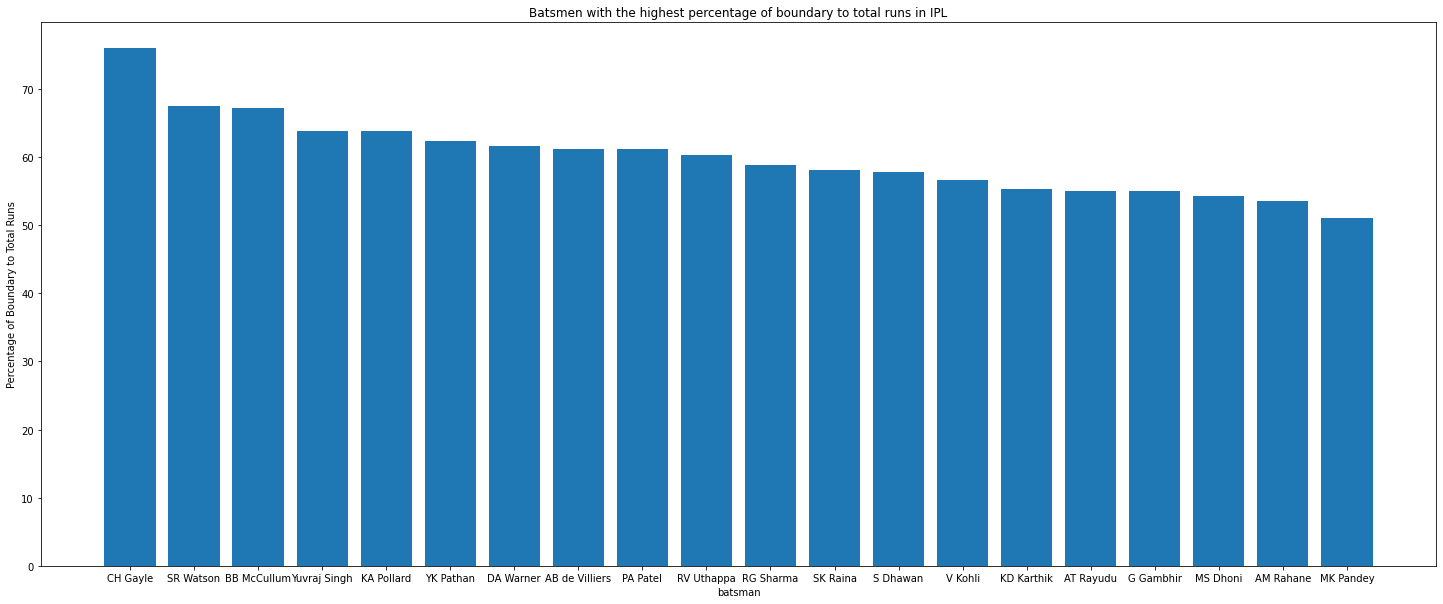

In [61]:
highest_boundary_percent = boundary_to_runs.iloc[:20,:]
highest_boundary_percent = highest_boundary_percent.sort_values(by='Percentage of Boundary to Total Runs', ascending =False).reset_index(drop=True)
highest_boundary_percent
plt.figure(figsize=(25,10))
plt.bar(highest_boundary_percent.batsman, highest_boundary_percent['Percentage of Boundary to Total Runs'])
plt.title('Batsmen with the highest percentage of boundary to total runs in IPL')
plt.xlabel('batsman')
plt.ylabel('Percentage of Boundary to Total Runs')
plt.show()

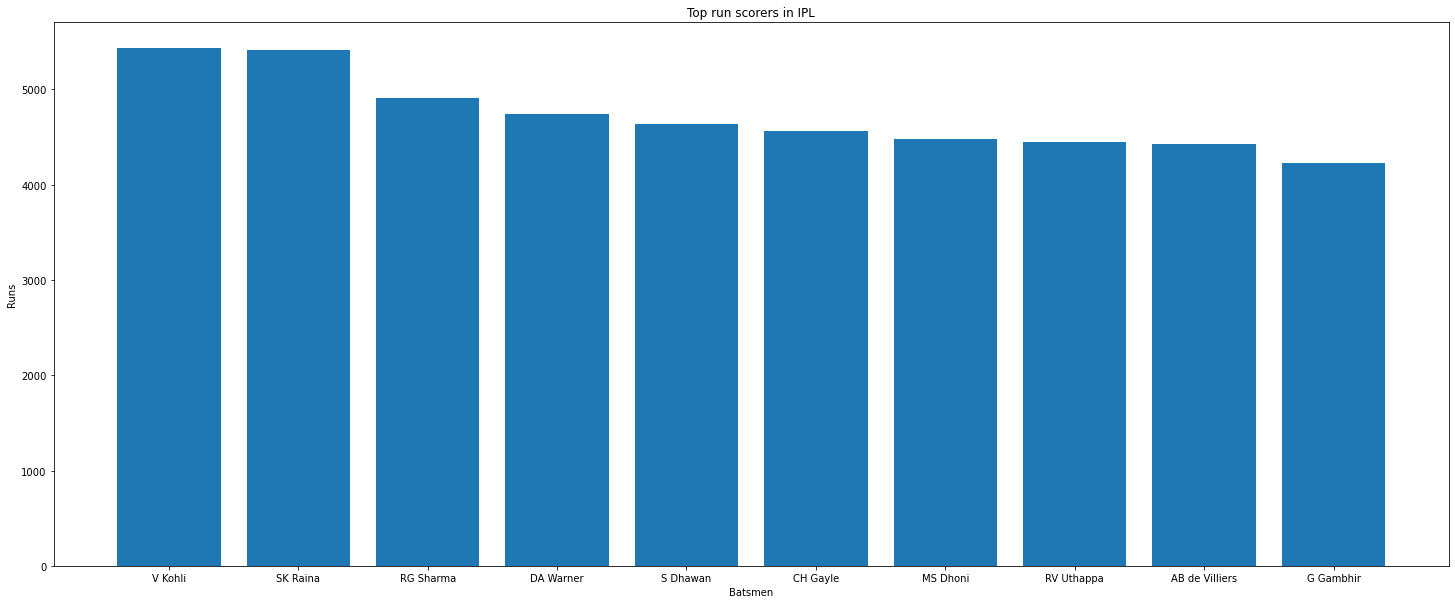

In [103]:
top20_batsmen = total_runs_batsmen.iloc[:10,:]
plt.figure(figsize=(25,10))
plt.bar(top10_batsmen.batsman, top10_batsmen.batsman_runs)
plt.xlabel('Batsmen')
plt.ylabel("Runs")
plt.title("Top run scorers in IPL")

plt.show()

In [78]:
final_batting_stats = final
final_batting_stats['strike_Rate'] = (final_batting_stats['Total Runs']/final_batting_stats['Balls'])*100
final_batting_stats

,batsman,Total Runs,Dots,Balls,balls to dot,strike Rate,strike_Rate
0,V Kohli,5434.0,1493,4211,2.820496,129.042983,129.042983
1,SK Raina,5415.0,1381,4044,2.928313,133.902077,133.902077
2,RG Sharma,4914.0,1390,3816,2.745324,128.773585,128.773585
3,DA Warner,4741.0,1254,3398,2.709729,139.523249,139.523249
4,S Dhawan,4632.0,1455,3776,2.595189,122.669492,122.669492
...,...,...,...,...,...,...,...
511,IC Pandey,0.0,2,2,1.000000,0.000000,0.000000
512,J Denly,0.0,1,1,1.000000,0.000000,0.000000
513,P Raj,0.0,1,1,1.000000,0.000000,0.000000
514,Sunny Gupta,0.0,1,1,1.000000,0.000000,0.000000


In [95]:
highest_strike_rate = final_batting_stats[final_batting_stats.Balls>240]
highest_strike_rate = highest_strike_rate.sort_values(by='strike_Rate',ascending=False)
highest_strike_rate


,batsman,Total Runs,Dots,Balls,balls to dot,strike Rate,strike_Rate
48,AD Russell,1445.0,284,803,2.827465,179.950187,179.950187
81,SP Narine,803.0,207,481,2.323671,166.943867,166.943867
37,RR Pant,1792.0,328,1104,3.365854,162.318841,162.318841
109,J Bairstow,468.0,89,293,3.292135,159.726962,159.726962
51,GJ Maxwell,1403.0,351,902,2.569801,155.543237,155.543237
...,...,...,...,...,...,...,...
140,SP Goswami,301.0,135,302,2.237037,99.668874,99.668874
121,CA Pujara,390.0,200,403,2.015000,96.774194,96.774194
141,UBT Chand,300.0,170,314,1.847059,95.541401,95.541401
126,A Mishra,368.0,179,410,2.290503,89.756098,89.756098


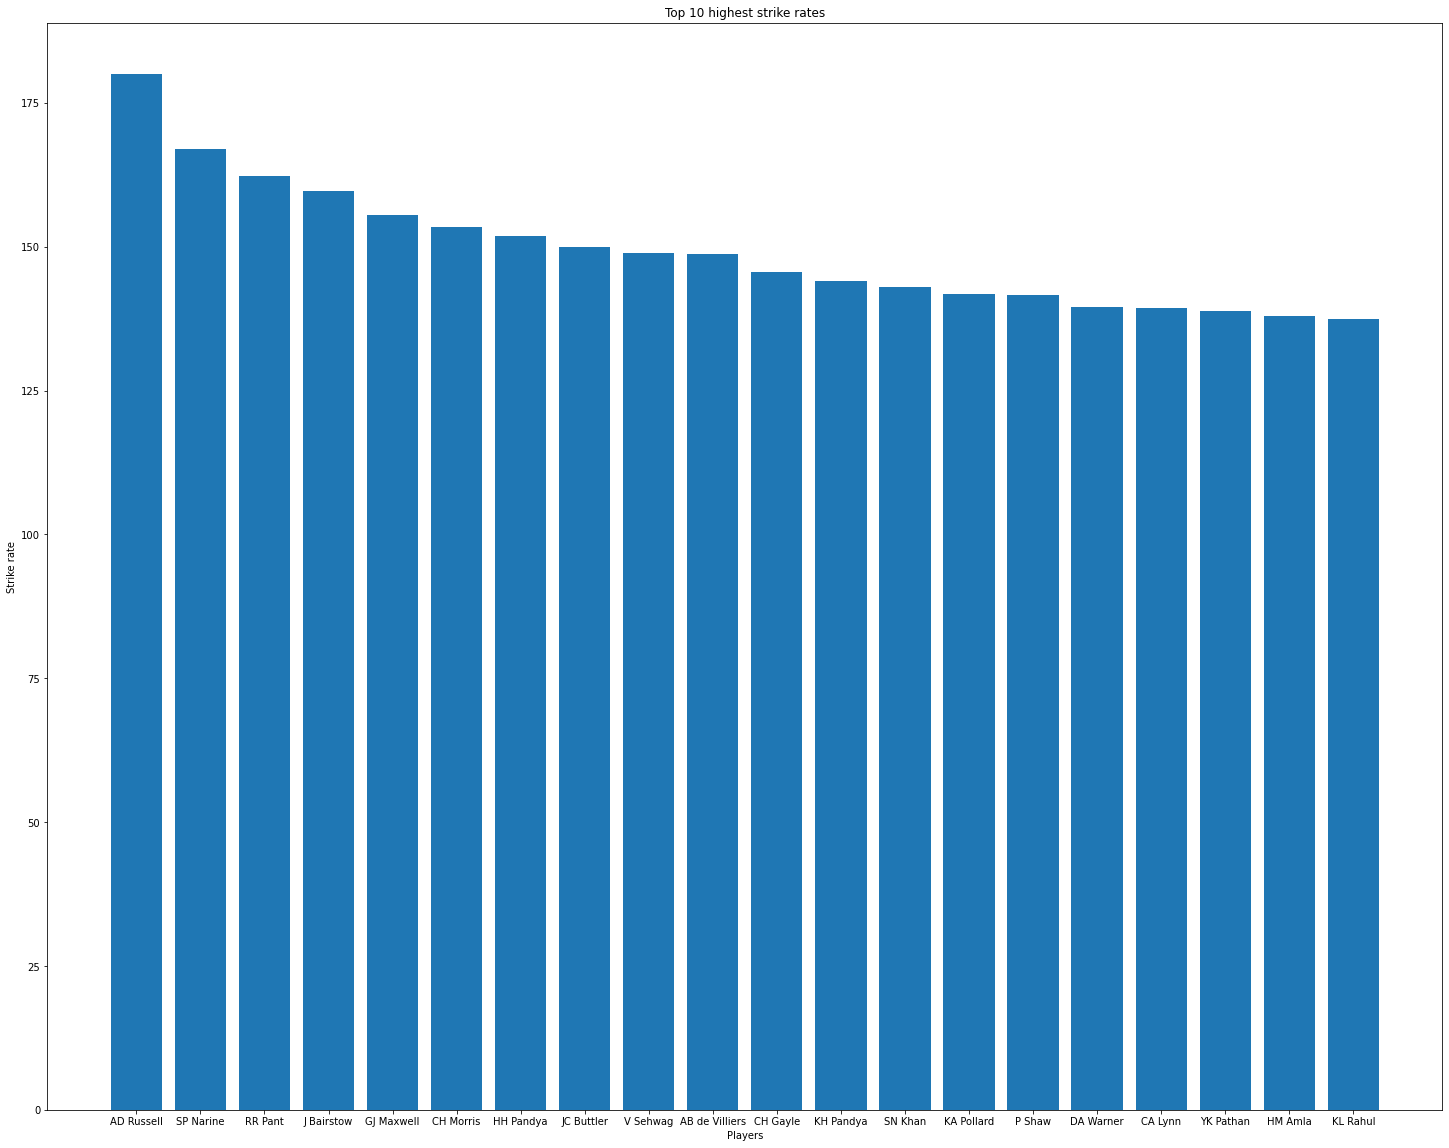

In [97]:

top_20_highest = highest_strike_rate.iloc[:20,:]
top_20_highest
plt.figure(figsize=(25,20))
plt.bar(top_20_highest.batsman, top_20_highest['strike_Rate'])
plt.title('Top 10 highest strike rates')
plt.xlabel('Players')
plt.ylabel('Strike rate')
plt.show()

In [105]:
match_winners = list(set(top_20_highest.batsman) & set(top20_batsmen.batsman))
print("Batsmen responsible for most wins are: ")
for elements in match_winners:
  print(elements)

Batsmen responsible for most wins are: 
CH Gayle
DA Warner
AB de Villiers


In [106]:
top10_runs = top20_batsmen.iloc[:10,:]
top10_sr = highest_strike_rate.iloc[:10,:]

top10_runs = top10_runs.batsman
top10_runs = top10_runs.values.tolist()

top10_sr = top10_sr.batsman
top10_sr = top10_sr.values.tolist()
print("Other mentions in terms of Runs: ")
for elements in top10_runs:
  print(elements)
     


Other mentions in terms of Runs: 
V Kohli
SK Raina
RG Sharma
DA Warner
S Dhawan
CH Gayle
MS Dhoni
RV Uthappa
AB de Villiers
G Gambhir


In [107]:

print("Other mentions in terms of Strike Rate: ")
for elements in top10_sr:
  print(elements)
     

Other mentions in terms of Strike Rate: 
AD Russell
SP Narine
RR Pant
J Bairstow
GJ Maxwell
CH Morris
HH Pandya
JC Buttler
V Sehwag
AB de Villiers


In [108]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [113]:
bowler = df.groupby('bowler')['total_runs'].agg(lambda x:(x==0).sum()).reset_index().sort_values(by='total_runs',ascending=False).reset_index(drop=True)
bowler

,bowler,total_runs
0,Harbhajan Singh,1244
1,SL Malinga,1144
2,B Kumar,1116
3,A Mishra,1108
4,PP Chawla,1100
...,...,...
400,F du Plessis,0
401,RA Tripathi,0
402,LRPL Taylor,0
403,RR Bhatkal,0


#### From above we can see Harbajan singh is best death bowler through out the tournment.


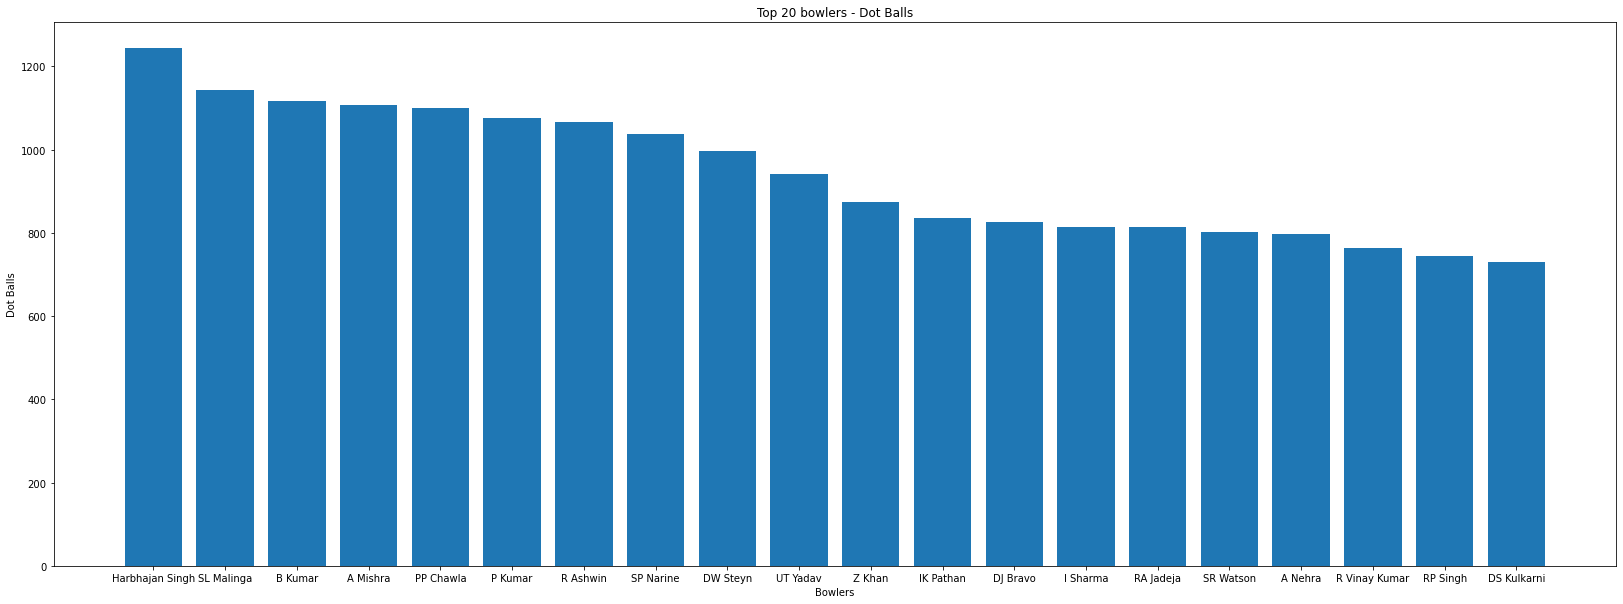

In [115]:

bowlers = df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
top20_bowlers = bowlers.iloc[:20,:]
plt.figure(figsize=(28,10))
plt.bar(top20_bowlers.bowler, top20_bowlers.total_runs)
plt.xlabel('Bowlers')
plt.ylabel("Dot Balls")
plt.title("Top 20 bowlers - Dot Balls")

plt.show()


In [116]:
bowling_wickets = df[df['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:20]
top_bowlers

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


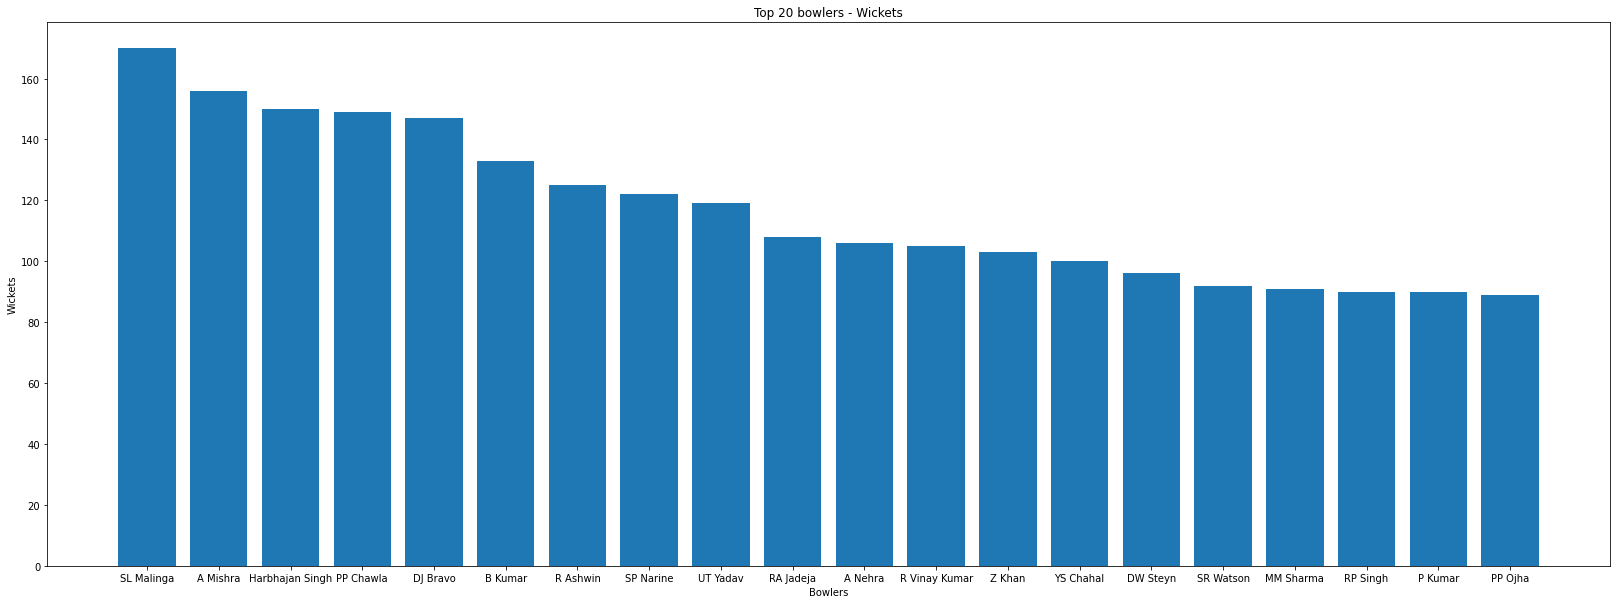

In [117]:

plt.figure(figsize=(28,10))
plt.bar(top_bowlers.bowler, top_bowlers.Wickets)
plt.xlabel('Bowlers')
plt.ylabel("Wickets")
plt.title("Top 20 bowlers - Wickets")

plt.show()

In [118]:
best_bowlers = list(set(top_bowlers.bowler) & set(top20_bowlers.bowler))
for elements in best_bowlers:
  print(elements)

SL Malinga
SP Narine
Harbhajan Singh
R Vinay Kumar
DJ Bravo
A Mishra
R Ashwin
PP Chawla
SR Watson
P Kumar
DW Steyn
B Kumar
RP Singh
RA Jadeja
UT Yadav
Z Khan
A Nehra


In [119]:
innings = df.groupby(['match_id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_innings =innings.sort_values(by='Innings Runs',ascending=False)
sorted_innings

,match_id,batsman,Innings Runs
6200,411.0,CH Gayle,175.0
900,60.0,BB McCullum,158.0
8426,562.0,AB de Villiers,133.0
10149,7935.0,RR Pant,130.0
9257,620.0,AB de Villiers,129.0
...,...,...,...
6845,455.0,DH Yagnik,0.0
404,27.0,V Kohli,0.0
1804,119.0,MM Patel,0.0
1802,119.0,LRPL Taylor,0.0


In [120]:
top10_scores = sorted_innings.iloc[:10,:]
top10_scores = top10_scores[['batsman','Innings Runs']]
top10_scores

,batsman,Innings Runs
6200,CH Gayle,175.0
900,BB McCullum,158.0
8426,AB de Villiers,133.0
10149,RR Pant,130.0
9257,AB de Villiers,129.0
5585,CH Gayle,128.0
3135,M Vijay,127.0
529,DA Warner,126.0
7752,V Sehwag,122.0
10417,SR Watson,121.0


In [121]:

fifty = sorted_innings.groupby('batsman')['Innings Runs'].agg(lambda x: (x>=50).sum()).reset_index().sort_values(by='Innings Runs', ascending=False).reset_index(drop=True)
fifty
     

,batsman,Innings Runs
0,DA Warner,48
1,V Kohli,43
2,SK Raina,39
3,AB de Villiers,37
4,S Dhawan,37
...,...,...
511,JDP Oram,0
512,JD Unadkat,0
513,J Yadav,0
514,J Theron,0


In [122]:
top10_fifty_scorers = fifty.iloc[:10,:]
top10_fifty_scorers

,batsman,Innings Runs
0,DA Warner,48
1,V Kohli,43
2,SK Raina,39
3,AB de Villiers,37
4,S Dhawan,37
5,RG Sharma,37
6,G Gambhir,36
7,CH Gayle,35
8,AM Rahane,29
9,RV Uthappa,24


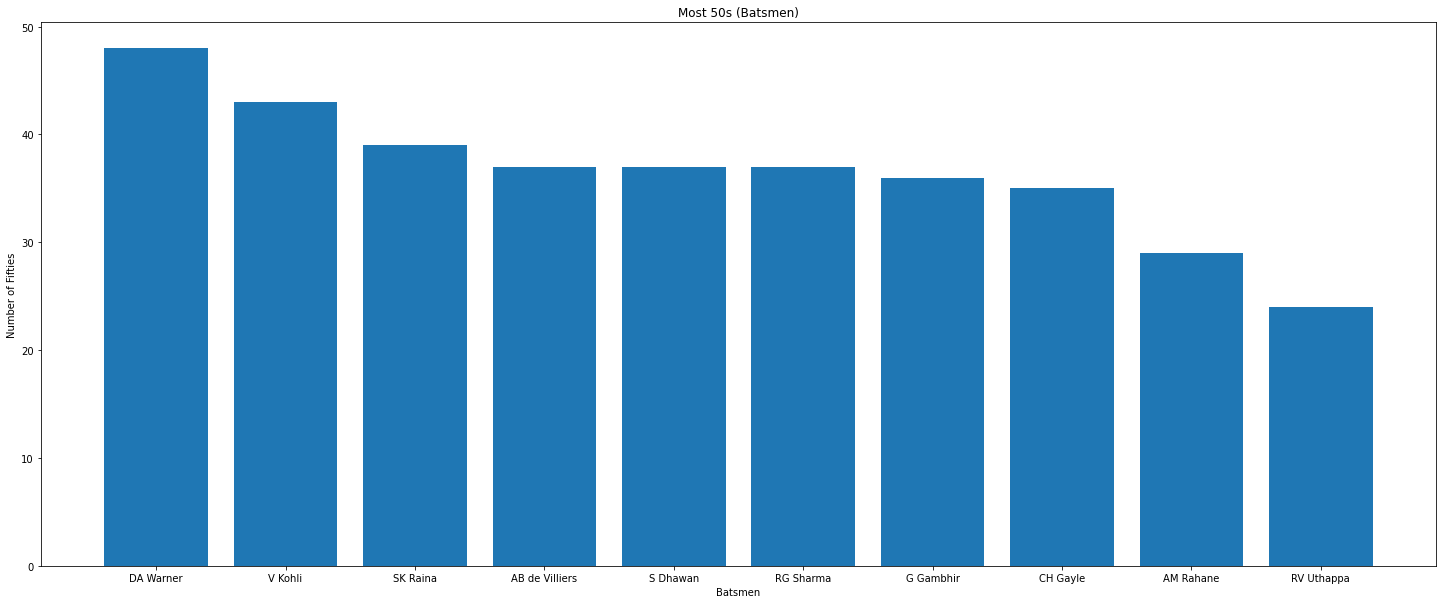

In [123]:
plt.figure(figsize=(25,10))
plt.bar(top10_fifty_scorers.batsman, top10_fifty_scorers['Innings Runs'])
plt.xlabel('Batsmen')
plt.ylabel("Number of Fifties")
plt.title("Most 50s (Batsmen)")

plt.show()

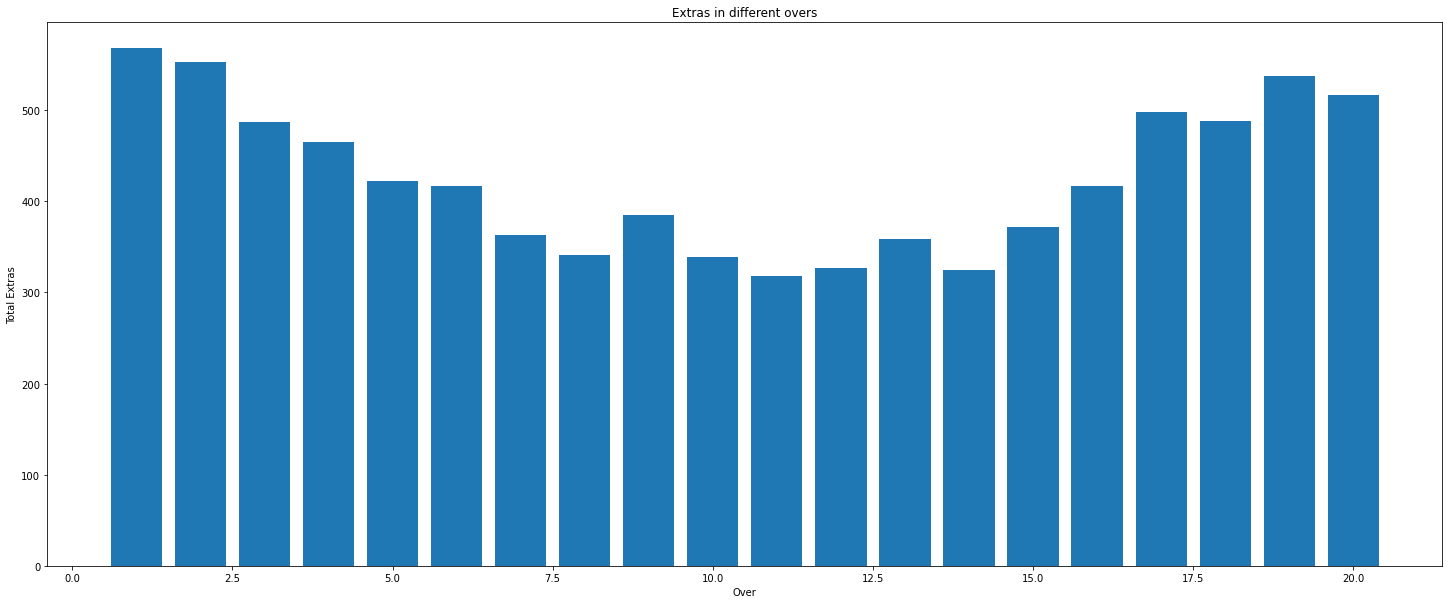

In [124]:

extras = df.groupby(['over','extra_runs']).apply(lambda x : np.sum(x['extra_runs'])).reset_index(name='Total_Extras')
extras = extras.sort_values(by='extra_runs',ascending=False)

plt.figure(figsize=(25,10))
plt.bar(extras.over, extras.Total_Extras)
plt.xlabel('Over')
plt.ylabel("Total Extras")
plt.title("Extras in different overs")

plt.show()

In [125]:
mean_score = innings['Innings Runs'].mean()

print("Mean Score of the Tournament: " + str(mean_score))

Mean Score of the Tournament: 19.770320524172128


In [126]:
median_score = innings['Innings Runs'].median()

print("Median Score of the Tournament: " + str(median_score))

Median Score of the Tournament: 13.0


<AxesSubplot:xlabel='total_runs', ylabel='count'>

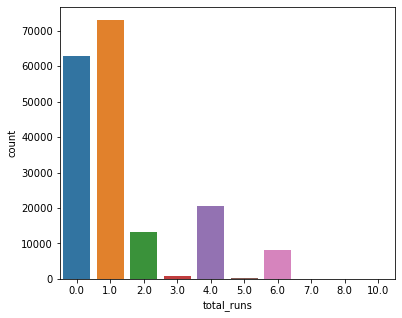

In [129]:
fig, ax=plt.subplots(figsize=(6,5))
sns.countplot(x='total_runs',ax=ax, data=df)
